#Prediksi Suhu Rata-Rata dengan Forecasting


*   1519620037 Zaimah Fira Azzahra
*   1519620030 Khoulah 'Afiifah


Dataset yang dianalisis dalam penelitian ini merupakan dataset dari website BMKG Stasiun Meteorologi Kemayoran dan website climatecharts. Data yang digunakan yaitu data temperatur rata-rata yang ada di daerah Jakarta.

####**Import Library**

In [ ]:
import pandas as pd #Library phyton untuk menganalisis data dan dataframe
import numpy as np #Library numerik untuk perhitungan

#import library untuk visualisasi 
import matplotlib.pyplot as plt
import seaborn as sns 

from datetime import datetime, date #Library untuk mengatur datetime

#time series analysis libraries
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#time series forecasting libraries
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

#Library untuk evaluasi model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#Library untuk trained model
import pickle

#Library untuk tidak menampilkan peringatan pada kernel
import warnings
warnings.filterwarnings("ignore") 

####**Load Data**

In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/My Drive/DSA/Suhu dataset.xlsx')

In [ ]:
df.head()

,Year,Tavg
0,1864,25.6
1,1865,25.4
2,1866,25.4
3,1867,25.5
4,1868,25.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    160 non-null    int64  
 1   Tavg    160 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.6 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Konversidata ke datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [ ]:
#Mengganti index ke datetime
df.set_index(['Year'], inplace=True)

In [ ]:
df.head()

,Tavg
Year,
1864-01-01,25.6
1865-01-01,25.4
1866-01-01,25.4
1867-01-01,25.5
1868-01-01,25.6


In [ ]:
#Melihat tanggal awal dan akhir data
df.index.min(), df.index.max()

(Timestamp('1864-01-01 00:00:00'), Timestamp('2023-01-01 00:00:00'))

In [ ]:
#Melakukan check data continuous
if (df.index.max() - df.index.min() == 159): 
    print('Data bersifat kontinyu')

In [ ]:
#Mengatur frekuensi data ke dalam tahun
df.index.freq='YS'

<div style="color:white;
           display:fill;
           background-color:black;
           font-family:Verdana;
           letter-spacing:0.3px">
<h3 style="color:white;padding-left:10px"><b>Poin dari data</b></h3>
       <p style="color:white;font-size:100%;padding-left:30px">
           1. Tidak ada nilai null<br>
           2. Panjang dari df adalah 159 <br>
           3. Tidak ada nilai duplikat <br>
           4. Data bersifat kontinyu, mulai dari 1864 hingga 2023 <br>
         </p>
    </div>

####**Visualisasi Data**

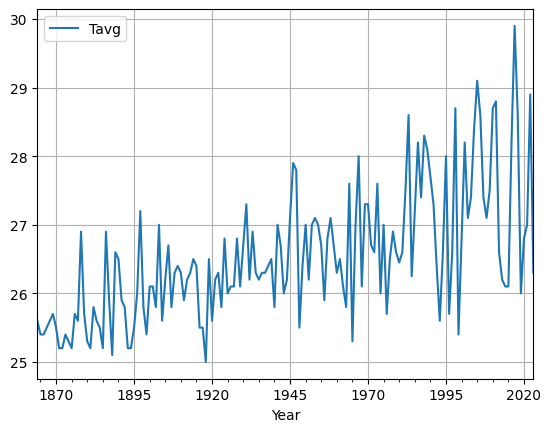

In [ ]:
df.plot(grid=True);

####**Split Data dan Uji Stasioneritas Data Time Series**

In [ ]:
# Split data (data train mulai dari 1864-2005 dan data test mulai dari tahun 2015)
train_df = df.loc[:'2005-01-01']
test_df = df.loc['2006-01-01':]

**Dekomposisi Time Series:**   
Time series biasanya terdiri dari komponen-komponen berikut:
   > **1) Trend :** Komponen ini biasanya naik, turun, atau konstan.  
   > **2) Seasonality :** periodik dari time series yang terjadi dalam setahun.   
   > **3) Residual :** Inilah yang tersisa dari deret waktu setelah tren dan musiman dihilangkan.  

Dekomposisi membagi deret waktu menjadi komponen-komponen di atas..

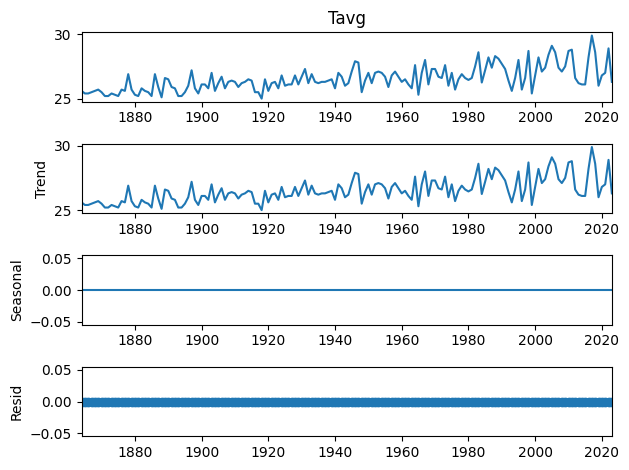

In [ ]:
#Visualisasi dari dekomposisi
decompose_add = seasonal_decompose(df['Tavg'])
decompose_add.plot();

In [ ]:
#Uji stasioneritas data
#Memasukkan fungsi adf test (uji statistik umum yang digunakan untuk menguji apakah suatu Time series stasioner atau tidak)
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    print ('----------------------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in adftest[4].items():
        adf_output['Critical Value (%s)'%key] = value
    print (adf_output)
    
#Memanggil fungsi adf dan passing series
adf_test(df.values)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                  -2.194872
p-value                          0.208112
#Lags Used                       5.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


In [ ]:
diff_df = df.diff()
diff_df.head()

,Tavg
Year,
1864-01-01,NaN
1865-01-01,-0.2
1866-01-01,0.0
1867-01-01,0.1
1868-01-01,0.1


In [ ]:
#Menghapus nilai agar stationer
diff_df.dropna(inplace=True)

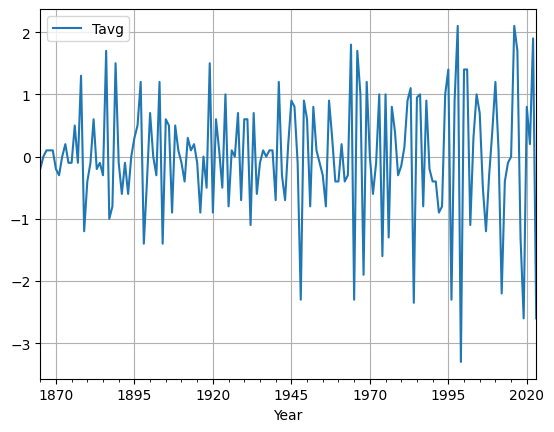

In [ ]:
diff_df.plot(grid=True);

In [ ]:
#Mamanggil adf test
adf_test(diff_df)

Results of Dickey-Fuller Test:
----------------------------------------------
Test Statistic                -6.501302e+00
p-value                        1.160037e-08
#Lags Used                     1.400000e+01
Number of Observations Used    1.440000e+02
Critical Value (1%)           -3.476598e+00
Critical Value (5%)           -2.881829e+00
Critical Value (10%)          -2.577589e+00
dtype: float64


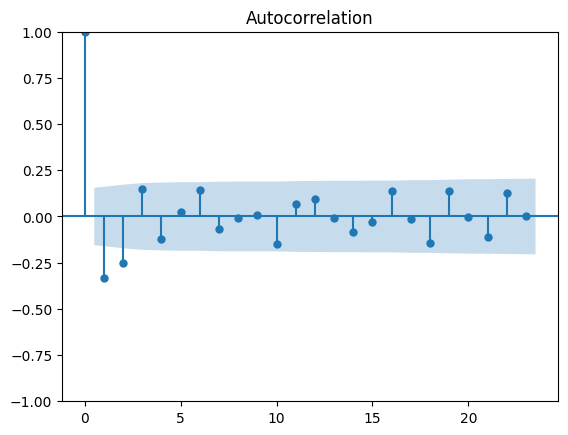

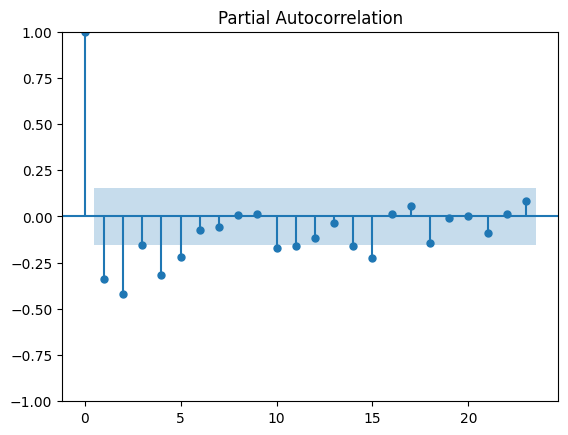

In [ ]:
#visualisasi hasil uji stasioneritas
plot_acf(diff_df);
plot_pacf(diff_df);

<div style="color:white;
           display:fill;
           background-color:black;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Poin Uji Stasioneritas</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           NIlai p-value sudah kurang dari 0.05 yang berarti data stasioner. Visualisasi data lag ke-3 autocorrelation dan partial autocorrelation tidak sama dapat dikatakan data tidak berkorelasi lagi  <br>
         </p>
    </div>

####**Modelling**

In [ ]:
#Melakukan model analisis timeseries double exponential smoothing dengan forecasting
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=26, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

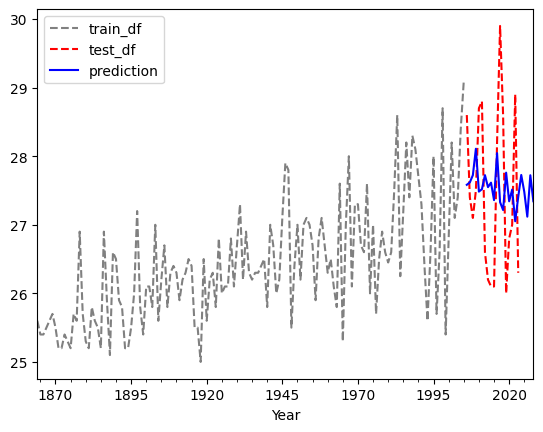

In [ ]:
#Menampilkan hasil visualisasi model dan prediksi
train_df['Tavg'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['Tavg'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
#Evaluasi model dengan RMSE
print('Train RMSE:',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Train MAPE:',mean_absolute_percentage_error(train_df, double_exp_train_pred))

Train RMSE: 0.6343139284082409
Train MAPE: 0.018650221999655277


<div style="color:white;
           display:fill;
           background-color:black;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Poin modelling data</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
           1.Model double exponential smoothing bekerja dengan baik<br>
           2.Hasil akan lebih baik jika proses model sesuai dengan uji parameter. <br>
           3.Nilai erorr data 0.64 akan lebih baik jika kurang dari itu. <br>
         </p>
    </div>

####**Prediksi Data**

In [ ]:
#Masukan model seperti yang telah dibuat disertai dengan nilai forecasting
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=26, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(20)

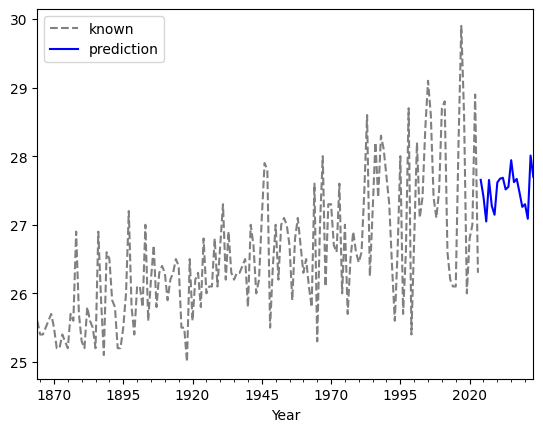

In [ ]:
#Visualisasi nilai Prediksi
df['Tavg'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='b', legend=True, label='prediction')
plt.show()

In [ ]:
#Memberikan file prediksi yang digunakan untuk deployment
pickle.dump(double_exp, open('forecast_model.sav','wb'))